# Fourier Transforms

In [2]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import math

## Part 1: The Discrete Fourier Transform

We’re about to make the transition from Fourier series to the Fourier transform. “Transition” is the
appropriate word, for in the approach we’ll take the Fourier transform emerges as we pass from periodic
to nonperiodic functions. To make the trip we’ll view a nonperiodic function (which can be just about
anything) as a limiting case of a periodic function as the period becomes longer and longer.

We're going to start by creating a pulse function. Let's start with the following pulse function:

In [3]:
def pulseFunction(x):
    return 1/(3 + (x-20)**2)

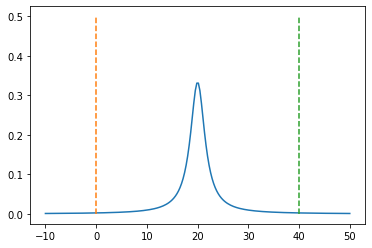

In [4]:
x = np.linspace(-10, 50, 200)
plt.plot(x, pulseFunction(x))
plt.plot(np.zeros(100), np.linspace(0, 0.5, 100), "--")
plt.plot(np.ones(100) *40, np.linspace(0, 0.5, 100), "--")
plt.show()

### Step 1: Periodic Pulse Function

Take the `pulseFunction` above and make it periodic. Give it a variable period length (we will eventually make this 40 as shown by the vertical dotted lines above). 

In [5]:
def periodicPulseFunction(x, period):
    """
    x : the x values to consider
    period : the period of the function
    """
    return pulseFunction(abs(x%period))

Plot your `periodicPulseFunction` with a period of $40$ from $-100$ to $100$ and check that it is correctly 

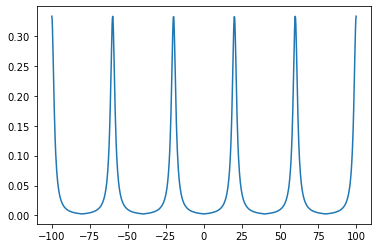

In [6]:
## TO DO: Plot your periodicPulseFunction with a period of 40 from x = -100 to x = 100
x = np.linspace(-100, 100, 1000)
plt.plot(x, periodicPulseFunction(x,40))
plt.show()

### Step 2: Define the Fourier Series 

This function is neither odd nor even, so we're going to have to take into account both the the even coefficients $a_k$ and the odd coefficients $b_k$.

$$ f(x) = \sum\limits_{k=0}^{\infty} a_k cos\left(\frac{2\pi k x}{T}\right) + b_k sin\left(\frac{2\pi k x}{T}\right)  $$

Complete the `fourierSeriesSum` that calculates the summation described above.  

In [7]:
def fourierSeriesSum(k, ak, bk, x, period):
    """
    Parameters:
        k  : the maximum k value to include in the summation above
        ak : an array of length 'k' containing the even coefficients (from a_0 to a_(k-1))
        bk : an array of length 'k' containing the odd coefficients (from b_0 to b_(k-1))
        x  : an array of the x values to consider
        period : the period of the function
    """
    sum = 0
    for i in range (k):
        sum += ak[i]*np.cos(2*np.pi*i*x/period)+bk[i]*np.sin(2*np.pi*i*x/period)
    
    return sum

### Step 3: Define the Integrands

Because we have both even and odd terms, we're going to have two separate integrals:

The integral to solve for the even terms:
$$ a_k = \frac{1}{T} \int\limits_{0}^{T} f(x, \text{period}) \cos\left(\frac{2\pi k x}{T} \right) dx$$



The integral to solve for the odd terms:
$$ b_k = \frac{1}{T} \int\limits_{0}^{T} f(x, \text{period}) \sin\left(\frac{2\pi k x}{T} \right) dx$$

In [8]:
def odd_integrand(x,f, k, period):
    """
    Parameters:
        x: the x values to consider
        f: the function f(x, period) used in the integral
        k: the k value to use
        period: the period of f
    """
    
    return f(x,period)*np.cos(2*math.pi*k*x/period)
q = np.array([1,2,3,4,5])
#print (odd_integrand(periodicPulseFunction, 1,100,q))

In [9]:
def even_integrand(x, f, k, period):
    """
    Parameters:
        x: the x values to consider
        f: the function f(x, period) used in the integral
        k: the k value to use
        period: the period of f
    """
    return f(x,period)*np.sin(2*math.pi*k*x/period)

### Step 4: Find the Fourier Coefficients

Ok! Now it's time to find the coefficients. This is the same process as last time:
1. Initialize an $a_k$ and $b_k$ array
2. Loop through all the $k$ values
3. Find $a_k[i]$ and $b_k[i]$ where i $\in [0, k]$
4. Return $a_k$ and $b_k$

(At the end of your quad function, add "limit = 100" as an argument)

In [10]:
def findFourierCoefficients(f, k, period):
    """
    Parameters:
        f: the function to evaluate
        k: the maximum k value to consider
        period: the period of f
    
    """
    ak = []
    bk = []
    for i in range (k):
        ak.append((1/period)*scipy.integrate.quad(odd_integrand,0,period, args = (f,i,period,),limit = 100 )[0])
        bk.append((1/period)*scipy.integrate.quad(even_integrand,0,period, args = (f,i,period,),limit = 100 )[0])
    return ak,bk

### Step 5: Putting it all Together

Let's test it out! 

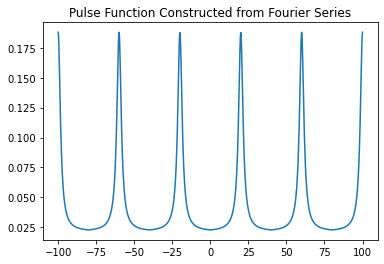

In [11]:
k = 100
period = 40

ak, bk = findFourierCoefficients(periodicPulseFunction, k, period)
y = fourierSeriesSum(k, ak, bk, x, period)
plt.plot(x, y)
plt.title("Pulse Function Constructed from Fourier Series")
plt.show()

### Step 6: Analyzing the Signal

Let's visualize what the coeffcients look like.

Plot the even coefficients ($a_k$ versus $k$).

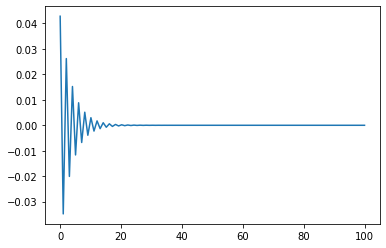

In [12]:
# TO DO: Plot ak versus k
k = np.linspace(0,100,100)
plt.plot(k,ak)

Plot the odd coefficients ($b_k$ versus $k$).

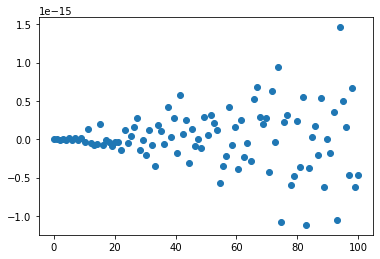

In [13]:
# TO DO: Plot bk versus k
plt.scatter(k,bk)

## Part 2: Application

### Option 1

Below I've imported and plotted a signal for you. Break down this signal into sines and cosines, and plot the coefficients ($a_k$ versus $k$ and $b_k$ versus $k$)

In [14]:
xNoise, yNoise = np.loadtxt("signal.txt", unpack=True)

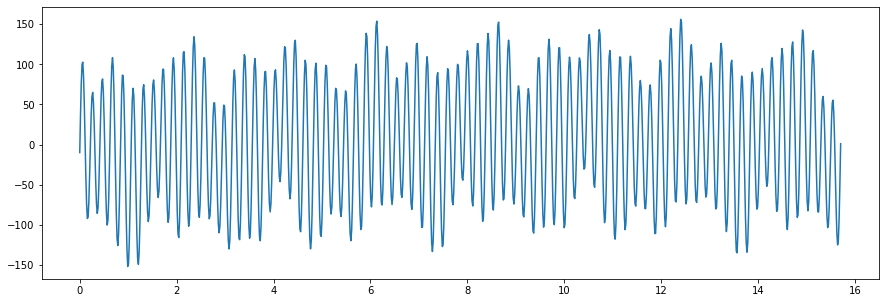

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(xNoise, yNoise)
plt.show()

In [16]:
def lagrangian_interpolation(x, a, fa, b, fb, c, fc):
    """
    Fits a quadratic to points (a, f(a)), (b, f(b)), and (c, f(c)) and returns an 
    approximation for f(x) for some value x between a and c from the 
    equation of a quadratic.
    Parameters:
        x (float): the point of interest between a and b
        a (float): known x value
        fa (float): known f(a) value
        b (float): known x value (b > a)
        fb (float): known f(b) value
        c (float): known x value (c > b)
        fc (float): known f(c) value
    Returns:
        (float): an approximation of f(x) using linear interpolation
    """
    return ((x - b) * (x - c)/((a - b) * (a - c)) * fa + (x - a) * (x - c) / ((b - a) * (b - c))*fb + (x - a)*(x - b) / ((c - a) * (c - b) ) * fc )

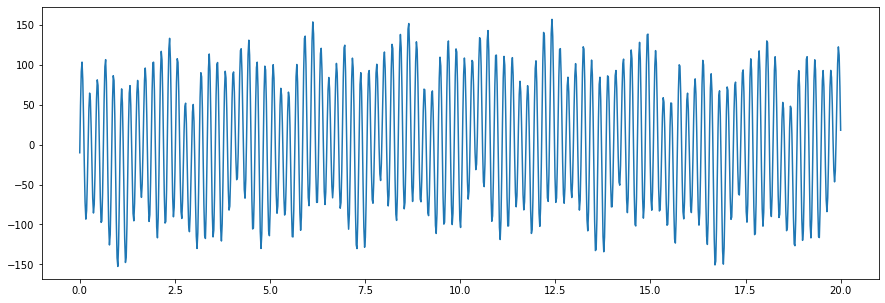

In [17]:
#Ignore this, it was a successful attempt to interpolate, but it failed becuase it was not compatible with the integrate function

def periodicNoise(x, period):
    """
    Returns a value from the periodic noise function
    """
    x = x % period
    try:
        vals = []
        for i in range (len(x)):
            val = -1
            for j in range (len(xNoise)-3):
                if (x[i]>=xNoise[j] and x[i]<=xNoise[j+1]):
                    val = j
                    break
            if (val==-1):
                vals.append(lagrangian_interpolation(x[i],xNoise[-3],yNoise[-3],xNoise[-2],yNoise[-2],xNoise[-1],yNoise[-1]))
            else:
                vals.append(lagrangian_interpolation(x[i],xNoise[val],yNoise[val],xNoise[val+1],yNoise[val+1],xNoise[val+2],yNoise[val+2]))

        return vals
    except: 
        val = 0
        for i in range (len(xNoise)-3):
            if (x>=xNoise[i] and x<=xNoise[i+1]):
                    val = i
                    break
            if (val==-1):
                return (lagrangian_interpolation(x,xNoise[-3],yNoise[-3],xNoise[-2],yNoise[-2],xNoise[-1],yNoise[-1]))
            else:
                return (lagrangian_interpolation(x,xNoise[val],yNoise[val],xNoise[val+1],yNoise[val+1],xNoise[val+2],yNoise[val+2]))

        return vals
        
xVal = np.linspace(0,20,1000);
yVal = periodicNoise(xVal, xNoise[-1])
plt.figure(figsize=(15, 5))
plt.plot(xVal,yVal)

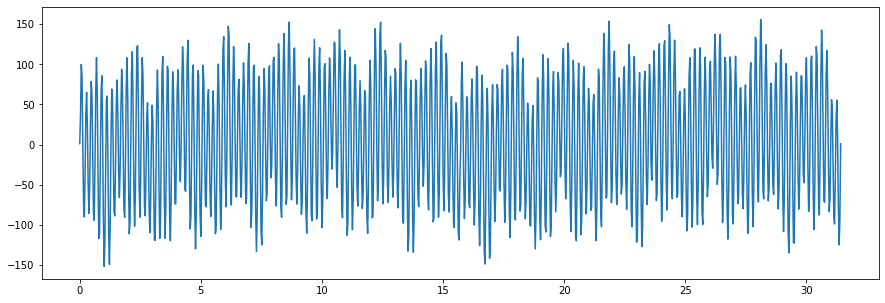

In [43]:
xx = np.linspace(0,10*np.pi,1000)
#makes the noise function periodic to be used later
def periodicFunc (x,period):
    x = np.mod(x,period)
    x = (np.round(x/(5*np.pi/1000),0)).astype(int)
    return yNoise[x-1]
#checking periodic noise function to see if accurate
plt.figure(figsize=(15, 5))
plt.plot(xx, periodicFunc(xx,5*np.pi))
    


<ipython-input-10-224e002cef56>:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  ak.append((1/period)*scipy.integrate.quad(odd_integrand,0,period, args = (f,i,period,),limit = 100 )[0])
<ipython-input-10-224e002cef56>:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  bk.append((1/period)*scipy.integrate.quad(even_integrand,0,period, args = (f,i,period,),limit = 100 )[0])
<ipython-input-10-224e002cef56>:12: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ak.append((1/period)*scipy.integrate.quad(odd_integrand,0,per

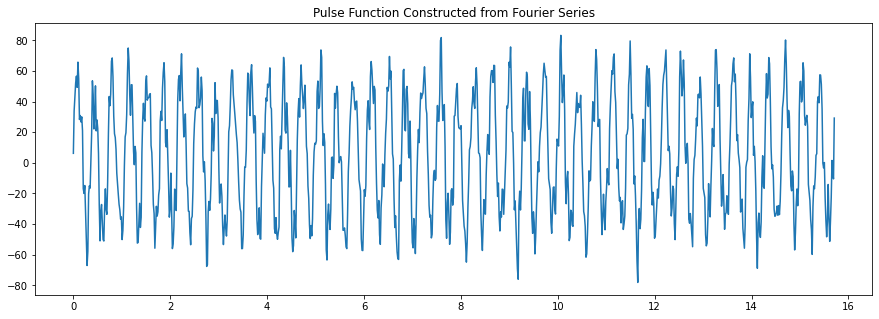

In [40]:
#Running the fourier transform

k = 100
period = 5*np.pi

ak, bk = findFourierCoefficients(periodicFunc, k, period)
y = fourierSeriesSum(k, ak, bk, x, period)
#graphing the results of the transform
plt.figure(figsize=(15, 5))
plt.plot(xx, y)
plt.title("Pulse Function Constructed from Fourier Series")
plt.show()

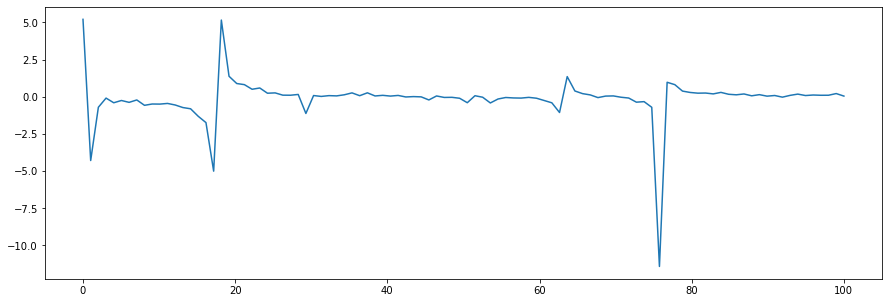

In [35]:
#plotting ak, the even function coefficients
k = np.linspace(0,100,100)
plt.figure(figsize=(15, 5))
plt.plot(k,ak)


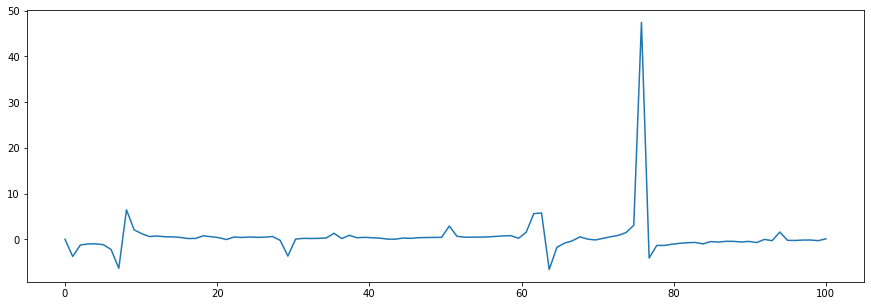

In [36]:
#plotting bk, the odd function coefficients
plt.figure(figsize=(15, 5))
plt.plot(k,bk)
#the signal seems to come from a frequency around 75

### Option 2

Find a signal from real data, and find the cosines and sines values that comprise that signal. 